## Project Description


See https://www.kaggle.com/c/jigsaw-toxic-severity-rating.

From [**Kaggle**](https://www.kaggle.com/c/jigsaw-toxic-severity-rating/data):
> In this competition you will be ranking comments in order of severity of toxicity. You are given a list of comments, and each comment should be scored according to their relative toxicity. Comments with a higher degree of toxicity should receive a higher numerical value compared to comments with a lower degree of toxicity.
> 
> **Disclaimer:** The dataset for this competition contains text that may be considered *profane, vulgar, or offensive*.




### Data Description

"*Your task is to predict a score that represents the relative toxic severity of the comment. Comments with a higher degree of toxicity should receive a higher numerical value compared to comments with a lower degree of toxicity; scores are relative, and not constrained to a certain range of values.*"

> Note, there is no training data for this competition. You can refer to previous Jigsaw competitions for data that might be useful to train models. But note that the task of previous competitions has been to predict the probability that a comment was toxic, rather than the degree or severity of a comment's toxicity.
> 
> **Toxic Comment Classification Challenge**\
> **Jigsaw Unintended Bias in Toxicity Classification**\
> **Jigsaw Multilingual Toxic Comment Classification**
> 
> While we don't include training data, we do provide a set of paired toxicity rankings that can be used to validate models.
> 
> #### Files
> 
> **comments_to_score.csv** - for each comment text in this file, your task is to predict a score that represents the relative toxic severity of the comment. Comments with a higher degree of toxicity should receive a higher numerical value compared to comments with a lower degree of toxicity; scores are relative, and not constrained to a certain range of values. NOTE: the rerun version of this file has ~14k comments that will be scored by your submitted model.\
> **sample_submission.csv** - a sample submission file in the correct format\
> **validation_data.csv** - pair rankings that can be used to validate models; this data includes the annotator worker id, and how that annotator ranked a given pair of comments; note, this data contains comments that are not found in comments_to_score.

### Imports

Import the following libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import seaborn as sns
import sklearn
import nltk
import numpy as np
import re
import pandas as pd
import string
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict

### Download The Datasets

Download the datasets from **Kaggle** (under the **Data** tab):\
[old dataset - "Toxic Comment Classification Challenge"](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data)\
[old dataset - "Jigsaw Unintended Bias in Toxicity Classification"](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data)\
[new dataset - "Jigsaw Rate Severity of Toxic Comments"](https://www.kaggle.com/c/jigsaw-toxic-severity-rating/data)

Or download the dataset from **Canvas** under **Files** > **Data**:\
[Kaggle-Toxic-Comments-Dataset (OLD)](https://canvas.sfu.ca/files/17538324/download?download_frd=1)\
[Kaggle-Toxic-Comments-Dataset-With-Bias (OLD)](https://canvas.sfu.ca/files/17742270/download?download_frd=1) (note this is a **756 Mb** file)\
[Kaggle-Toxic-Comments-Dataset (NEW)](https://canvas.sfu.ca/files/17622704/download?download_frd=1) is the dataset we will be using to evaluate our model.

## Extract Features From Dataset 

Use **NLTK** to extract **features** from the **Toxic Comments** dataset.\
The **features** will be used to train various Machine Learning models to identify toxic comments.


### Transforming Data Into Features
be non-toxic, toxic, very toxic, and extremely toxic, but we have to replace them by a number.

In [10]:
# Read training dataset
df_train = pd.read_csv('jigsaw-toxic-comment-classification-challenge/train.csv')

print(f'Number of rows and columns = {df_train.shape}')

Number of rows and columns = (159571, 8)


In [11]:
# columns of dataset
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [12]:
# Head of dataset
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [13]:
# Checking nulls

print("Nulls in training dataset \n\n",df_train.isnull().sum())

Nulls in training dataset 

 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [15]:
# Sample comments corresponding to each category

for column in ['toxic' , 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']:
    print(f'column : {column}')
    print(f'{df_train.loc[df_train[column] == 1 , "comment_text"].sample(1)}\n')

column : toxic
55232    Wow, how stupid are you guys? Speaking of self...
Name: comment_text, dtype: object

column : severe_toxic
135533    EUROVISION IS GAY CUZ OF OLD SHIT EADTERN BLOC...
Name: comment_text, dtype: object

column : obscene
36938    love to suck fat, black cock. I
Name: comment_text, dtype: object

column : threat
24373    I don't quite understand why you are so strong...
Name: comment_text, dtype: object

column : insult
13052    fuck u bitches.fuck u bitches.fuck u bitches.f...
Name: comment_text, dtype: object

column : identity_hate
84995    Niggas in da hood! Badman, bo selecta! WOOF!
Name: comment_text, dtype: object



obviously there's some of punctuation in the middle of the senetense which have to removed
and there 're upper and lower case to gether which have to solve too

In [16]:
df_train_copied = df_train.copy()
df_sentences = pd.DataFrame(pd.DataFrame(df_train_copied[df_train_copied.columns[2:]].sum(axis=1)).reset_index()[0].value_counts())
df_sentences["Total no. of sentences"]=df_sentences[0]
df_sentences["Total No. of labels in a sentence"]=df_sentences.index
df_sentences.drop([0],axis=1,inplace=True,)
df_sentences

,Total no. of sentences,Total No. of labels in a sentence
0,143346,0
1,6360,1
3,4209,3
2,3480,2
4,1760,4
5,385,5
6,31,6


In [17]:
def text_cleaning(text):
  
    template = re.compile(r'https?://\S+|www\.\S+')  # website links
    text = template.sub(r'', text)

    soup = BeautifulSoup(text, 'lxml')  # HTML tags
    only_text = soup.get_text()
    text = only_text

    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    text = re.sub(r"[^a-zA-Z\d]", " ", text)  # special characters
    text = re.sub(' +', ' ', text)  # extra spaces
    text = text.strip()  # spaces at the beginning and at the end of string
    
    punctuations = set(string.punctuation)          
    text = ''.join(ch for ch in text if ch not in punctuations) # remove punctuation characters
    
    text = text.lower() # make all characters lower case
    
    sign_list = {'&': ' and ', '/': ' or ', '\xa0': ' '}  # Replaces any sign with words like & with 'and', in the text.
    for i in sign_list:          
        if i in text:
            text = re.sub(i, sign_list[i], text)
    
    stop_words = set(stopwords.words('english')) 
    text = [word for word in text.split() if word not in stop_words] # remove stopwords
    text = " ".join(text)

    # Replace repeating characters more than 3 times to length of 3
    text = text.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')
    # patterns with repeating characters 
    text = text.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    text = text.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    text = text.replace(r'[ ]{2,}',' ').strip() 
    
    #text = " ".join(text)

    return text

In [18]:
df_train['comment_text'] = df_train['comment_text'].apply(text_cleaning)

In [19]:
df_train['comment_text'].sample(5)

36875     fyi unplugging router tonight go bed ip change...
132875    might confused sarah goldberg also 7th heaven ...
141898    fucking pig spread propaganda much made articl...
150031    europhiles cannot silence europhiles cannot si...
59154     corresponding data transfer rate kilobits kbit...
Name: comment_text, dtype: object

In [20]:
# Create a score that measure how much toxic is a comment
cat_mtpl = {'obscene': 0.10, 'toxic': 0.20, 'threat': 0.5, 
            'insult': 0.62, 'severe_toxic': 0.7, 'identity_hate': 1}

for category in cat_mtpl:
    df_train[category] = df_train[category] * cat_mtpl[category]

df_train['score'] = df_train.loc[:, 'toxic':'identity_hate'].sum(axis=1)

In [21]:
df_train.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,score
8633,16ee69f062b8a7ed,stop dork two play play stupid game talk contribs,0.2,0.0,0.1,0.0,0.62,0,0.92
153737,a1c78fcc9fc75f61,yo tom dont know else get hold trying think ea...,0.0,0.0,0.0,0.0,0.00,0,0.00
123247,9350fb83a6dc00cd,hey edits corey allen reverted factual,0.0,0.0,0.0,0.0,0.00,0,0.00
81176,d92526c0f13f89d4,detailed explanation theory,0.0,0.0,0.0,0.0,0.00,0,0.00
49443,8436c6ada4ffbbef,wait second request automatically get carried ...,0.0,0.0,0.0,0.0,0.00,0,0.00


In [22]:
n_toxic = len(df_train[df_train['score'] != 0])
n_normal = len(df_train[df_train['score'] == 0])
print(f"Number of toxic comments = {n_toxic}")
print(f"Number of normal comments = {n_normal}")

Number of toxic comments = 16225
Number of normal comments = 143346


obviously the number of classes not balance , we should balance them for training our models

In [23]:
indexes_to_drop = df_train[df_train['score'] == 0].index[n_normal//5:]

In [24]:
df_train.drop(indexes_to_drop , inplace = True)

In [25]:
n_toxic = len(df_train[df_train['score'] != 0])
n_normal = len(df_train[df_train['score'] == 0])
print(f"Number of toxic comments = {n_toxic}")
print(f"Number of normal comments = {n_normal}")
print(f'Total number of training samples: {len(df_train)}')

Number of toxic comments = 16225
Number of normal comments = 28669
Total number of training samples: 44894


## Feature Engineering

make new column called **labels** to make us apply them on **classification models**

like we made **score** column to apply our data on **regression models**

In [26]:
data_tragets = pd.DataFrame(pd.unique(df_train['score'].values), columns=['target_value']). \
sort_values(by='target_value', ascending = True).reset_index(drop=True)

THRESHOLD = data_tragets['target_value'].quantile(q=0.2)

df_train['labels'] = df_train['score'].map(lambda x: 1 if x < THRESHOLD else 2 if x < THRESHOLD*2 else 3 if x < THRESHOLD*3 else 4 if x < THRESHOLD*4 else 5)

df_train = df_train[['comment_text','score','labels']].reset_index(drop=True)

df_train.sample(5)

,comment_text,score,labels
36192,done bigjob mother tits,0.30,1
21592,dear sniperz11 thanks help advice shall try be...,0.00,1
37292,gay scientology ass kissing baby fucker lulz d...,1.92,3
41302,roisterer prime example place badly regarded r...,0.20,1
7850,like try help could explain perspective blocke...,0.00,1


## Read validation and test dataset

In [27]:
df_valid = pd.read_csv('jigsaw-toxic-severity-rating/validation_data.csv')
df_test = pd.read_csv('jigsaw-toxic-severity-rating/comments_to_score.csv')

In [28]:
df_valid.head()

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"


In [29]:
df_test.head()

,comment_id,text
0,114890,"""\n \n\nGjalexei, you asked about whether ther..."
1,732895,"Looks like be have an abuser , can you please ..."
2,1139051,I confess to having complete (and apparently b...
3,1434512,"""\n\nFreud's ideas are certainly much discusse..."
4,2084821,It is not just you. This is a laundry list of ...


In [30]:
# Apply text cleaning on them

df_valid['less_toxic'] = df_valid['less_toxic'].apply(text_cleaning)
df_valid['more_toxic'] = df_valid['more_toxic'].apply(text_cleaning)
df_test['text'] = df_test['text'].apply(text_cleaning)

## Apply TFIDF Vectorizer to training data to get input features

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(use_idf=True ,decode_error='ignore')

X = tf_idf.fit_transform(df_train['comment_text'])

In [32]:
first_vectors = X[0]
df = pd.DataFrame(first_vectors.T.todense() , index = tf_idf.get_feature_names(),columns=['TFidf'])
df = df.sort_values(by=["TFidf"],ascending=False)
df.head(10)

,TFidf
dolls,0.283865
metallica,0.276560
vandalisms,0.270728
closure,0.249289
hardcore,0.236266
gas,0.229780
retired,0.225578
205,0.222909
fac,0.220938
voted,0.220465


## Task: Decision Tree   (5 Marks)

Build a *decision tree* model to identify toxic comments.

which transforms the regression problem into a 5-class classification task.

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
clf = DecisionTreeClassifier()

# Train the model
X_features = X
y = df_train['labels']

clf.fit(X_features , y)

DecisionTreeClassifier()

In [36]:
sample_comment = ['what the fuck']
test = tf_idf.transform(sample_comment)
pred = clf.predict(test)
print(f"predicted label = {pred}")

predicted label = [2]


----
## SVM Classifier

Build an [SVM classifier](https://scikit-learn.org/stable/modules/svm.html#classification) that identifies toxic comments.

In [39]:
from sklearn.svm import SVC

# Define the model

clf_svc = SVC(C = 1.0 , kernel = 'linear' , degree = 3 , gamma = 'auto', probability=True)
# train the model

X_features = X
y = df_train['labels']

clf_svc.fit(X_features , y)

SVC(gamma='auto', kernel='linear', probability=True)

In [40]:
sample_comment = ['what the fuck']
test = tf_idf.transform(sample_comment)
pred = clf_svc.predict(test)
print(f"predicted label = {pred}")

predicted label = [3]


----
##  Language Model  

Build a *language model* to identify toxic comments.

Recall that language models can be built using n-grams.

Construct a **Tri-gram** language model


In [42]:
def generate_ngrams(text , ngram=1):
    words = [token for token in text.split()]
    ngrams = zip(*[words[i:] for i in range(0,ngram)])
    result = [' '.join(ngram) for ngram in ngrams]
    return result

In [43]:
def get_most_frequent(list_of_ngrams):
    frequent_dict = defaultdict(int)
    for token in list_of_ngrams:
        frequent_dict[token]+=1
    df_grams = pd.DataFrame(sorted(frequent_dict.items(), key=lambda x: x[1])[::-1])
    return df_grams

In [44]:
def get_most_frequent_words(ngram):
    for i in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
        text = ' '.join(df_train_copied[df_train_copied[i] == 1]['comment_text'].sample(2).values)
        ngrams = generate_ngrams(text , ngram)
        frequents = get_most_frequent(ngrams)
        plt.figure(figsize=(15,8))
        plt.title("{} most common tokens".format(i))
        sns.barplot(frequents[0] , frequents[1])
        plt.xticks(rotation = 90)
        plt.show()

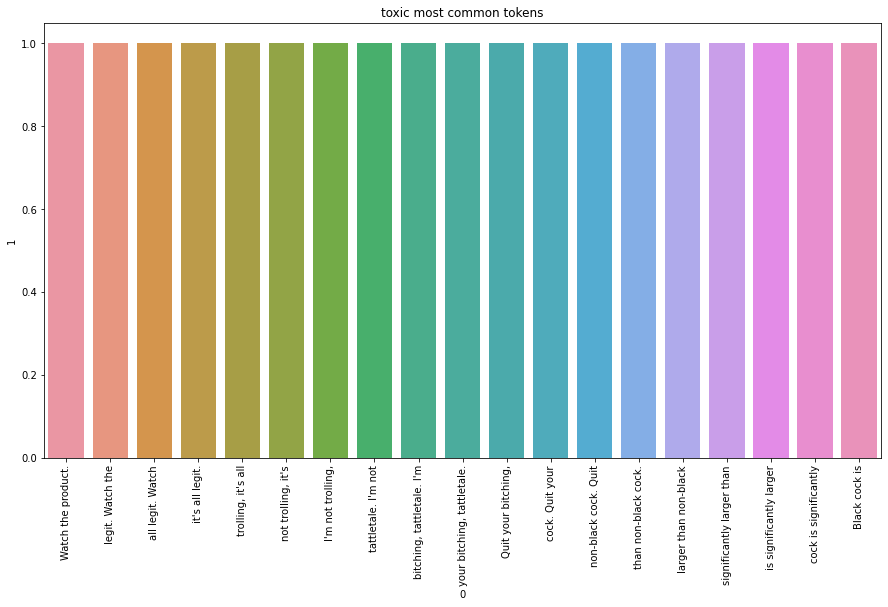

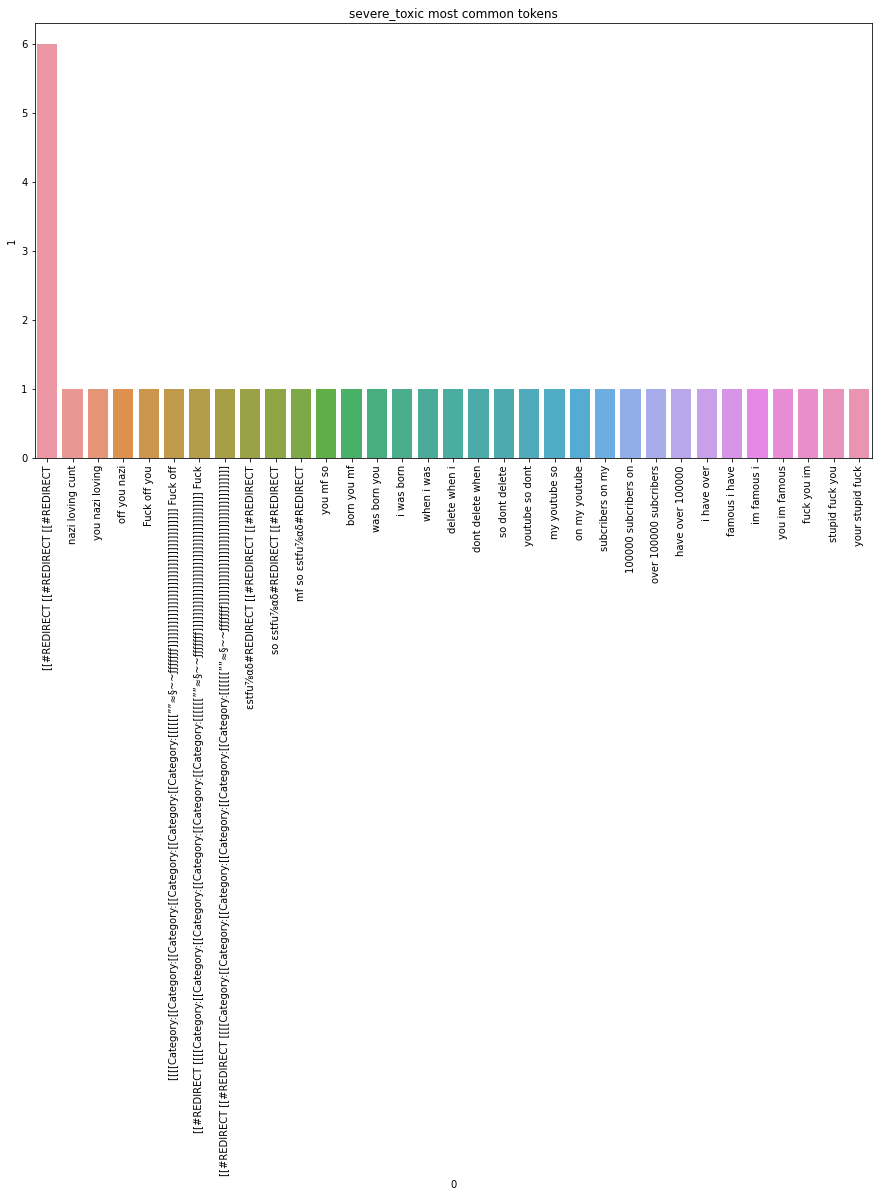

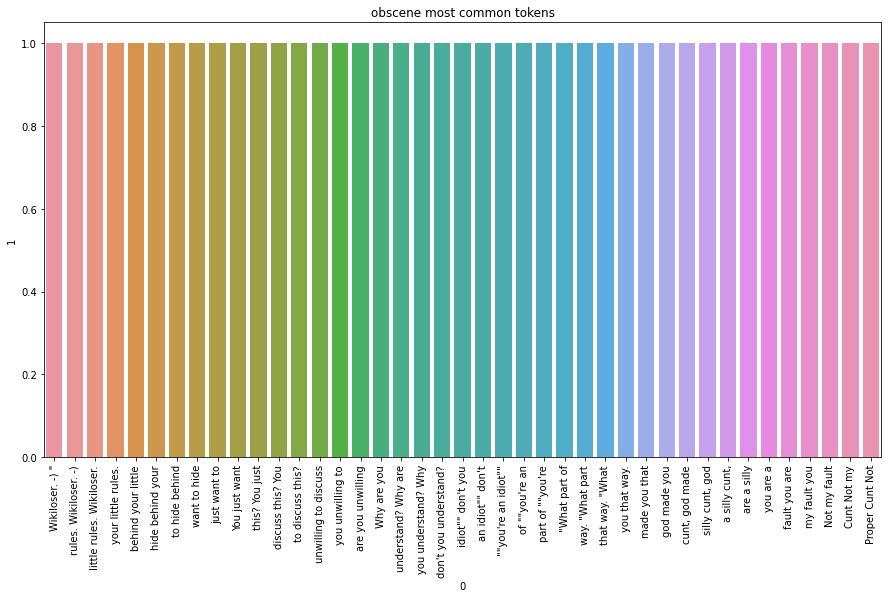

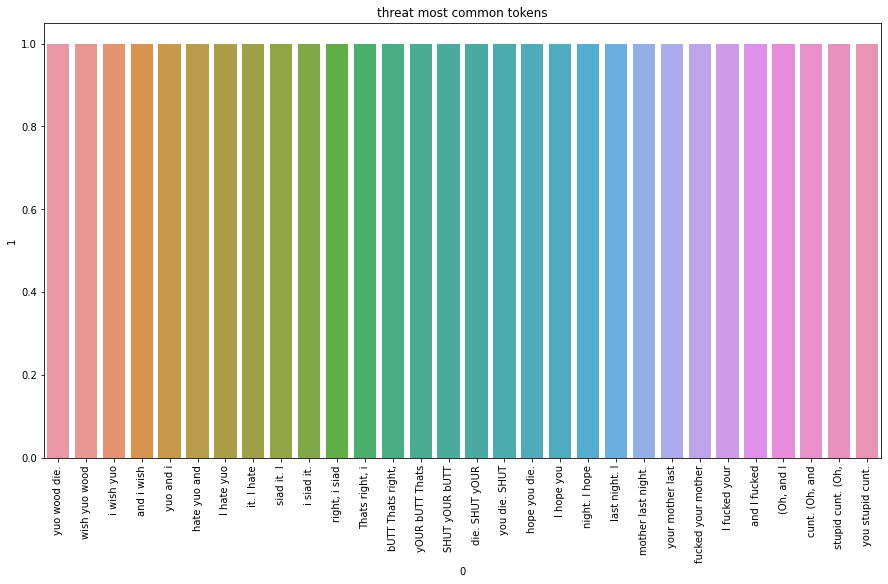

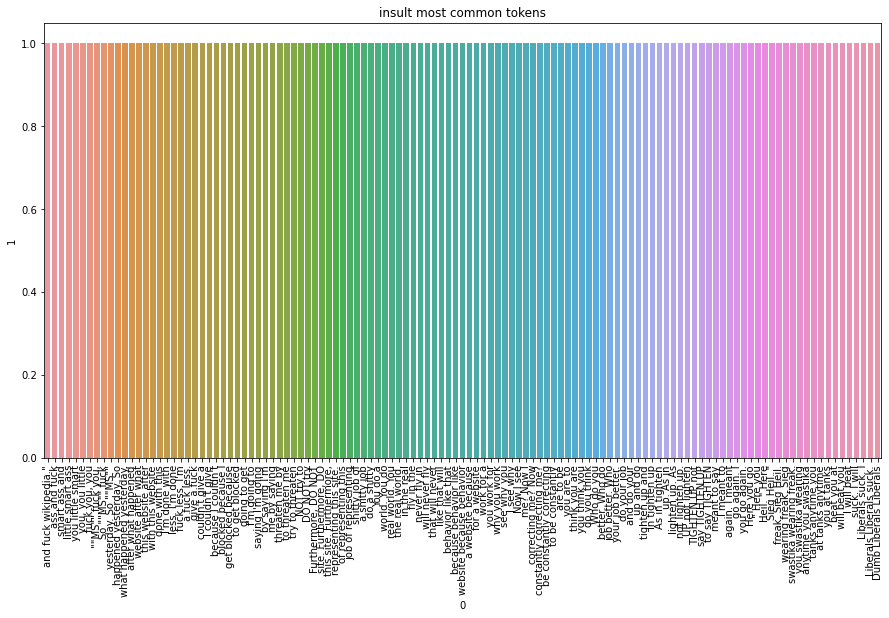

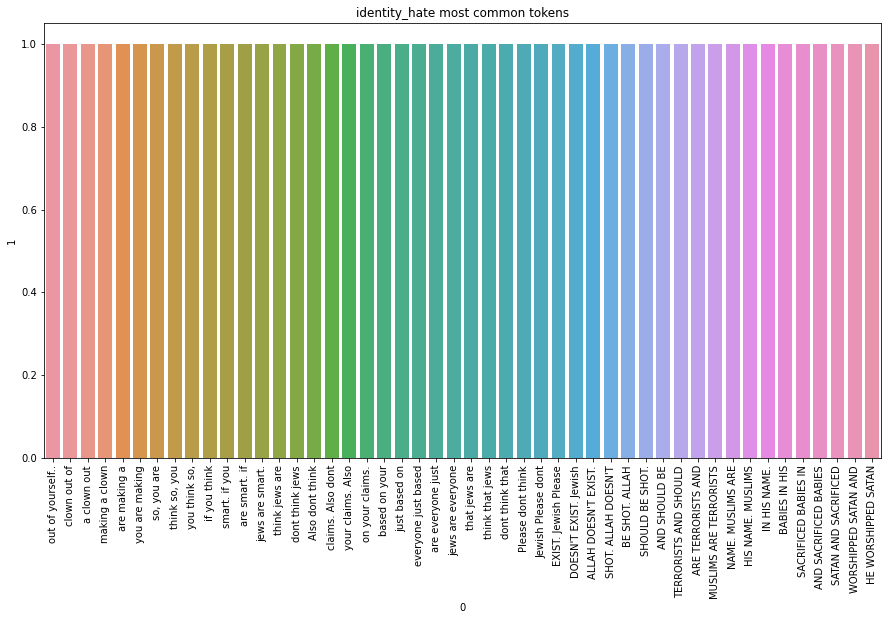

In [45]:
# Create a Trigram language model
get_most_frequent_words(3)

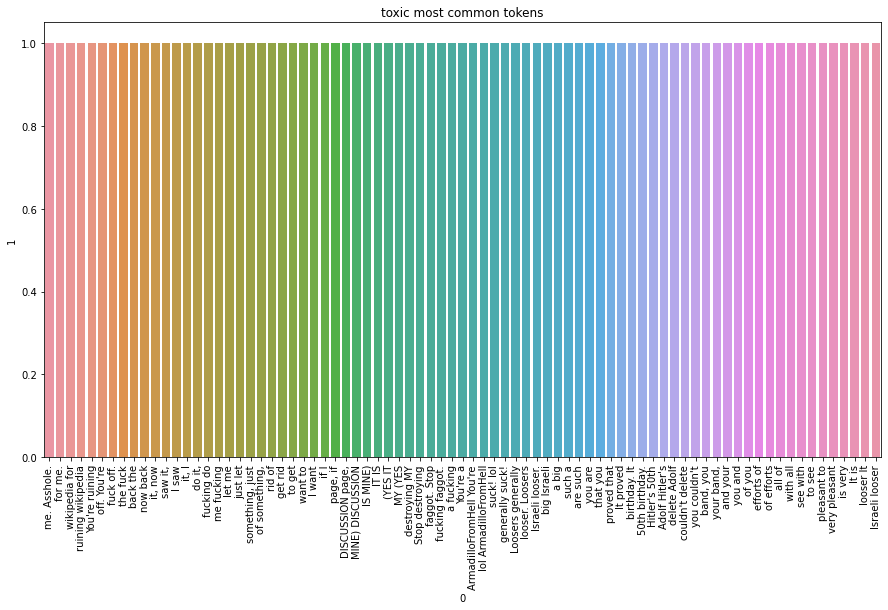

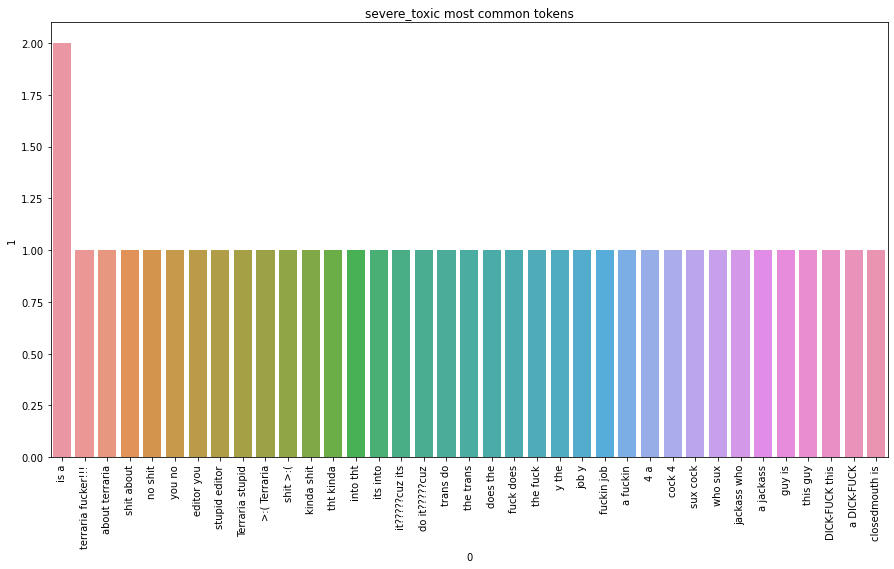

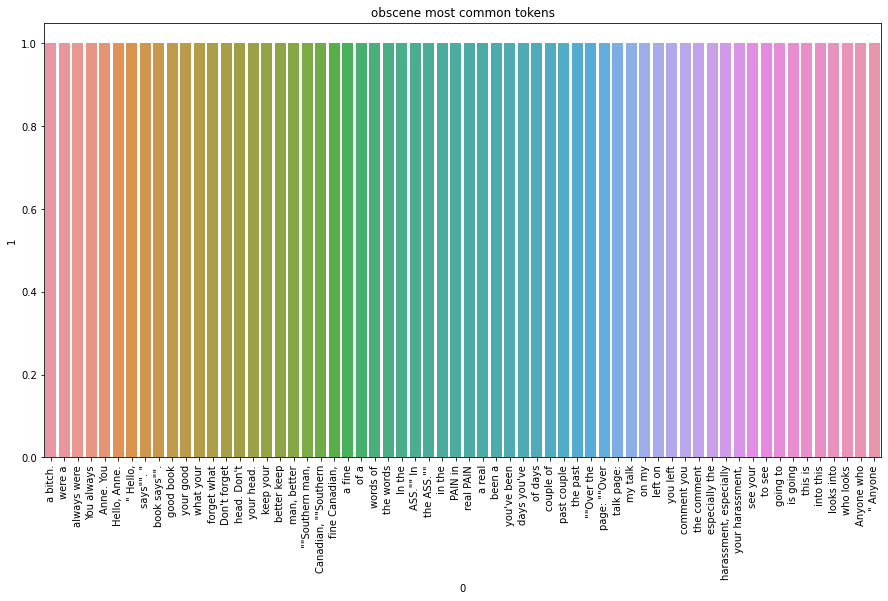

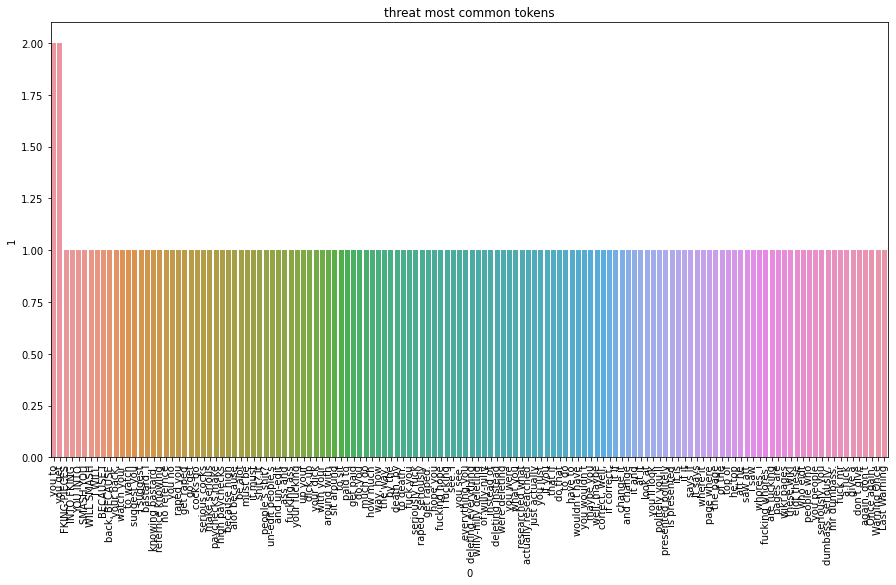

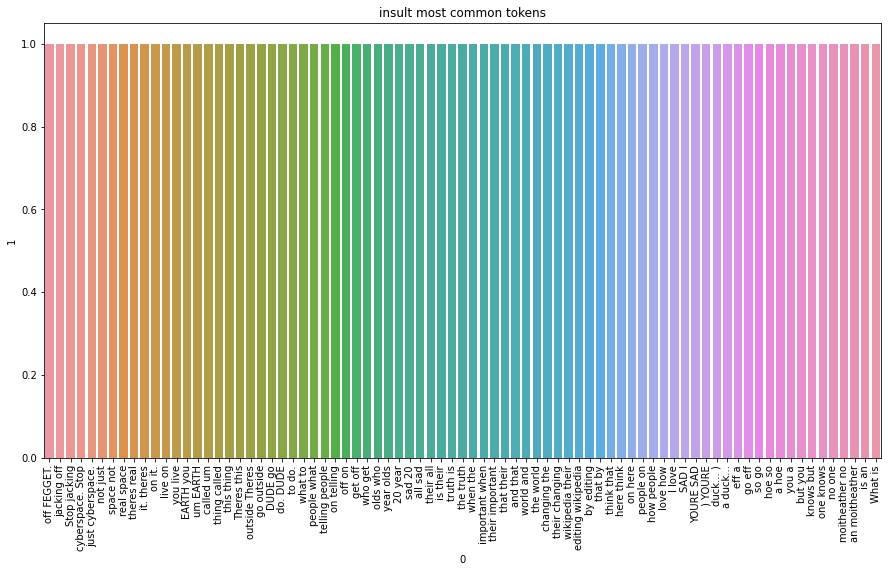

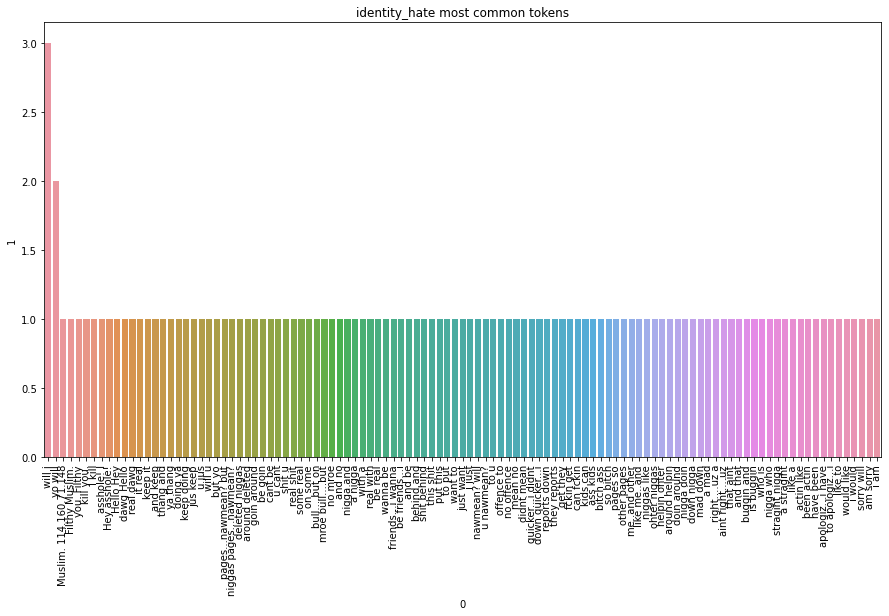

In [46]:
# Create a Bigram language model
get_most_frequent_words(2)

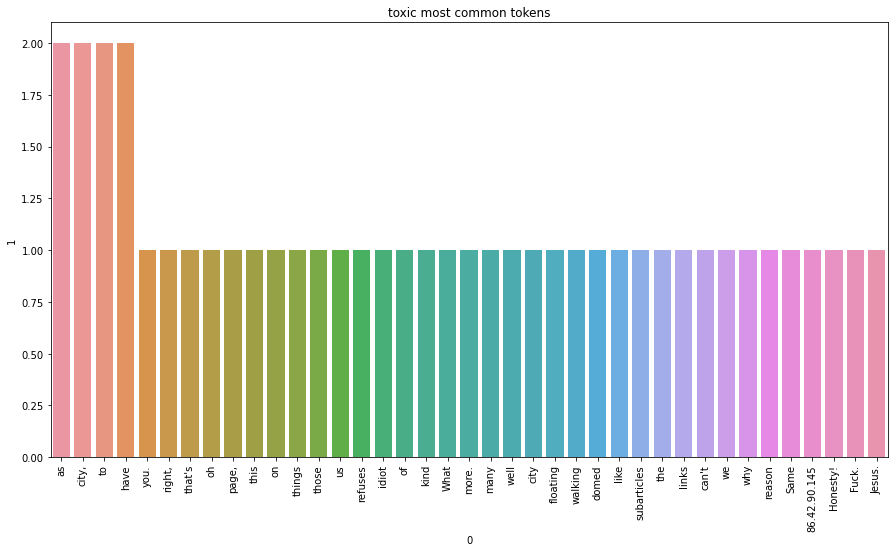

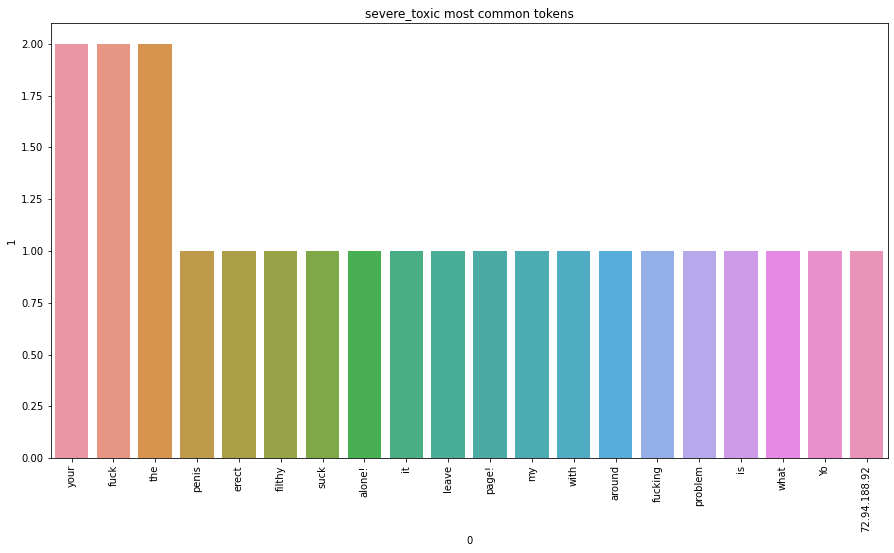

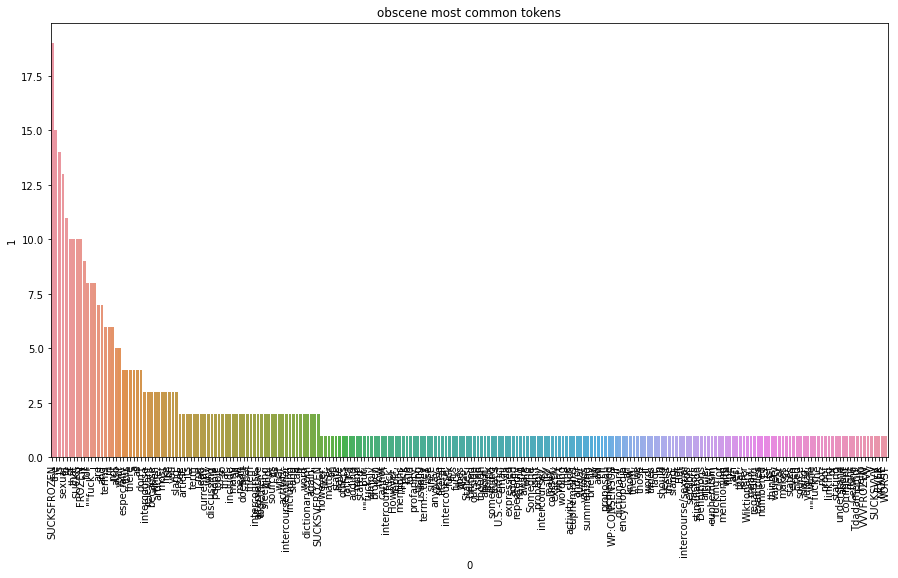

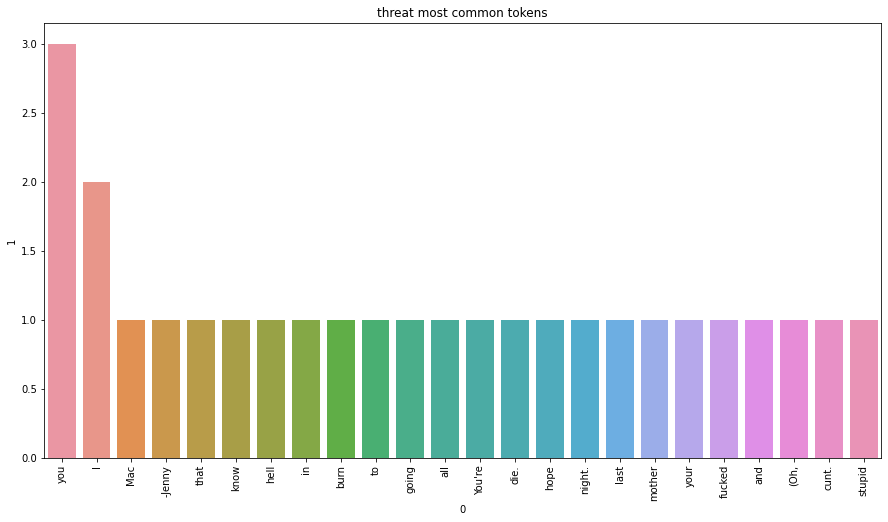

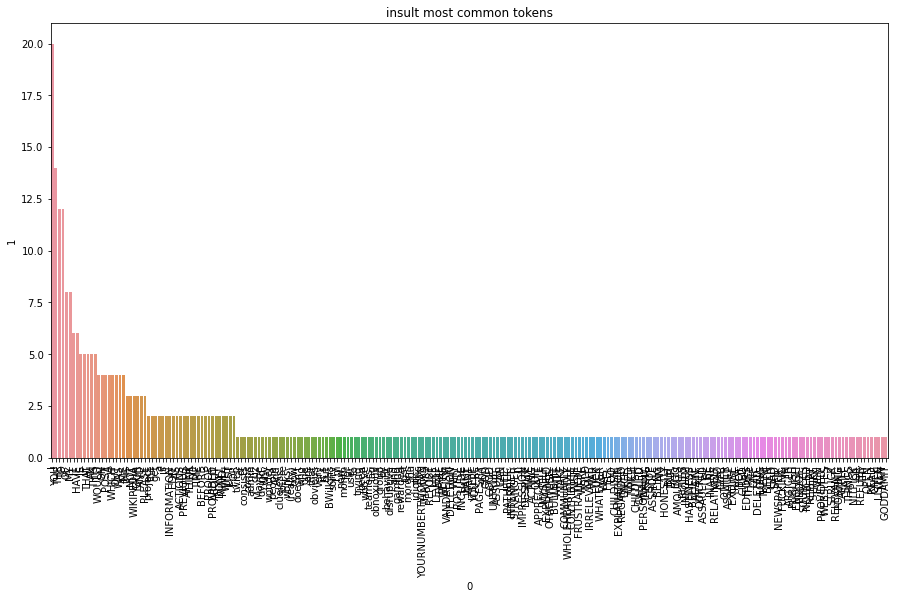

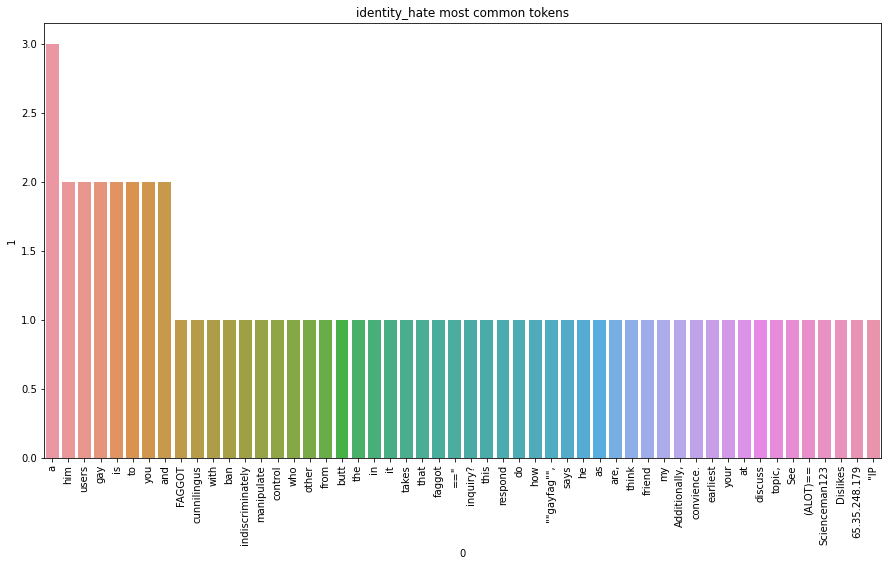

In [47]:
# Create a Unigram language model
get_most_frequent_words(1)


In [48]:
from nltk.lm.preprocessing import padded_everygram_pipeline

trump_corpus = list(df_train['comment_text'].apply(word_tokenize))

n = 3
train_data, padded_sents = padded_everygram_pipeline(n, trump_corpus)

from nltk.lm import MLE
trump_model = MLE(n) 
trump_model.fit(train_data, padded_sents)


from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenize = TreebankWordDetokenizer().detokenize
def generate_sent(model, num_words, random_seed=42):
  
    content = []
    for token in model.generate(num_words, random_seed=random_seed):
        if token == '<s>':
            continue
        if token == '</s>':
            break
        content.append(token)
    return detokenize(content)

In [49]:
generate_sent(trump_model, num_words=20, random_seed=0)

'stock native louisvillians midwestern accent attitude jefferson county defined separately multi string guitars type guitar narciso yepes words attempt misrepresent'

## Random Forest Model 

Build a *random forest model* to identify toxic comments.

### Random Forest Classifier

The **scikit-learn** implementation of **Random Forest** "*combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class*".\
Code examples for implementing a **Random Forest Classifier** is [here](https://scikit-learn.org/stable/modules/ensemble.html#forest).\
API information on **Random Forest Classifiers** is [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier).


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Define the model

clf_rfc = RandomForestClassifier(n_estimators=100)

# train the model

X_features = X
y = df_train['labels']

clf_rfc.fit(X_features , y)

RandomForestClassifier()

In [53]:
sample_comment = ['what the fuck']
test = tf_idf.transform(sample_comment)
pred = clf_rfc.predict(test)
print(f"predicted label = {pred}")

predicted label = [2]


## Voting Ensemble 

A **Voting Ensemble** classifier "*combine conceptually different machine learning classifiers and use a majority vote (hard vote) or the average predicted probabilities (soft vote) to predict the class labels*". "*In his highly influential Society of Mind theory, Marvin Minsky proposes that human minds are constructed from an ensemble of agents*" (from "**AI: A Modern Approach**" pg. 434, 3rd ed.).

From https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier:
> *The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.*

Using **scikit-learn**, create two **Voting Ensemble Classifiers** (*hard voting* and *soft voting*) consisting of the following models:
* SVM classifier
* Decision Tree classifier
* Random Forest classifier

Use the default parameters for both *hard voting* and *soft voting* classifiers.

Code examples for implementing a **Voting Ensemble Classifier** is [here](https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier).\
API information on **Voting Ensemble Classifiers** is [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier).

### Soft Voting

In [56]:
from sklearn.ensemble import VotingClassifier

# Define the model

clf_voting = VotingClassifier(estimators=[('DecisionTreeClassifier', clf), ('SVM classifier', clf_svc), 
                                    ('Random Forest classifier', clf_rfc)],  voting='soft')

# Train the model
X_features = X
y = df_train['labels']
clf_voting.fit(X_features, y)


VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier()),
                             ('SVM classifier',
                              SVC(gamma='auto', kernel='linear',
                                  probability=True)),
                             ('Random Forest classifier',
                              RandomForestClassifier())],
                 voting='soft')

In [57]:
sample_comment = ['what the fuck']
test = tf_idf.transform(sample_comment)
pred = clf_voting.predict(test)
print(f"predicted label = {pred}")

predicted label = [2]


### Hard Voting

In [58]:
# Define the model

clf_voting2 = VotingClassifier(estimators=[('DecisionTreeClassifier', clf), ('SVM classifier', clf_svc), 
                                    ('Random Forest classifier', clf_rfc)],  voting='hard')

# Train the model
X_features = X
y = df_train['labels']
clf_voting2.fit(X_features, y)


VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier()),
                             ('SVM classifier',
                              SVC(gamma='auto', kernel='linear',
                                  probability=True)),
                             ('Random Forest classifier',
                              RandomForestClassifier())])

In [59]:
sample_comment = ['what the fuck']
test = tf_idf.transform(sample_comment)
pred = clf_voting2.predict(test)
print(f"predicted label = {pred}")

predicted label = [2]


----
## Neural Network 

Build a *neural network* to identify toxic comments.

In [61]:
X_features = X
y = df_train['labels']

In [62]:
y.shape

(44894,)

In [63]:
X_features.shape

(44894, 77982)

In [64]:
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense


def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0

model = keras.Sequential()
model.add(Dense(64, activation='relu', input_dim=100000))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                6400064   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 6,400,129
Trainable params: 6,400,129
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit_generator(generator=batch_generator(X_features.todense(), y, 32),
                     epochs=5, steps_per_epoch=X_features.shape[0]/32)

----
## Task: Naive Bayes Classifier   (5 Marks)

Build a **Naive Bayes classifier** to identify toxic comments.

In [68]:
from sklearn.naive_bayes import MultinomialNB

clf_NB = MultinomialNB(alpha=40.0, fit_prior=False)

X_features = X
y = df_train['labels']

clf_NB.fit(X_features , y)


MultinomialNB(alpha=40.0, fit_prior=False)

In [69]:
sample_comment = ['what the fuck']
test = tf_idf.transform(sample_comment)
pred = clf_NB.predict(test)
print(f"predicted label = {pred}")

predicted label = [2]


## Task: Evaluation   (10 Marks)

The following classification models are to be evaluated (default parameters can be used in both models):
* [Gaussian Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) 
* [Decision Tree classifier](https://scikit-learn.org/stable/modules/tree.html#classification)
* SVM classifier
* Tri-gram Language Model
* Neural Network classifier
* Random Forest classifier
* Ensemble Model classifier

Models will be *trained* on the **training data**.
Models will be *evaluated* on the **test data**.
    
The data used in the evaluation comes from `validation_data.csv`.

In [77]:
def evaluation_model(model , data_validation , data_test , name):
    
    data_valid_vectorize1 = tf_idf.transform(data_validation['less_toxic'])
    data_valid_vectorize2 = tf_idf.transform(data_validation['more_toxic'])
    
    scores_less_toxic = model.predict_proba(data_valid_vectorize1)
    scores_more_toxic = model.predict_proba(data_valid_vectorize2)
    
    data_validation['less_toxic_score'] = scores_less_toxic[:,1]

    data_validation['more_toxic_score'] = scores_more_toxic[:,1]
    
    data_validation['result'] = \
        data_validation['more_toxic_score'] > data_validation['less_toxic_score']
    

    print(f"{name} Correct predictions: {data_validation['result'].sum() / data_validation.shape[0]}")
          
#  ***************************************predict test data**********************************************
          
    data_test_vectorize = tf_idf.transform(data_test['text'])
    
    scores = model.predict_proba(data_test_vectorize)
    df_test_copy = data_test.copy()
          
    df_test_copy['score'] = scores[:, 1]
          
    df_test_copy = df_test_copy[['comment_id','score']]
    
    return df_test_copy

In [78]:
predict_nb = evaluation_model(clf_NB , df_valid , df_test , 'Naive Bayes classifier')
predict_decisionTree = evaluation_model(clf , df_valid , df_test , 'Decision Tree classifier')
predict_svm = evaluation_model(clf_svc , df_valid , df_test , 'SVM classifier')
predict_rfc = evaluation_model(clf_rfc , df_valid , df_test , 'Random Forest classifier')
predict_voting = evaluation_model(clf_voting , df_valid , df_test , 'Ensemble Model classifier')

Naive Bayes classifier Correct predictions: 0.613591072140295
Decision Tree classifier Correct predictions: 0.23093529958814932
SVM classifier Correct predictions: 0.6406602896240202
Random Forest classifier Correct predictions: 0.6049554935565298
Ensemble Model classifier Correct predictions: 0.6346485983791683


## Plotting & Visualizations

Examples of various plots and visualizations.

### Visualize the number of each category in all sentences

In [73]:
list_of_categories = ['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']
list_of_count_categories = [df_train_copied[col].sum() for col in list_of_categories]

In [74]:
df_counts = pd.DataFrame({'labels':list_of_categories , 'counts':list_of_count_categories})
df_counts = df_counts.sort_values(by='counts',ascending=False)

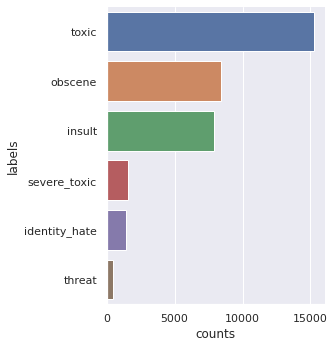

In [75]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,8)})
sns.catplot(x='counts' , y='labels',data = df_counts , kind='bar')
plt.show()

### Total no. of sentences and labels

Text(0.5, 0, 'Total No. of labels in a sentence')

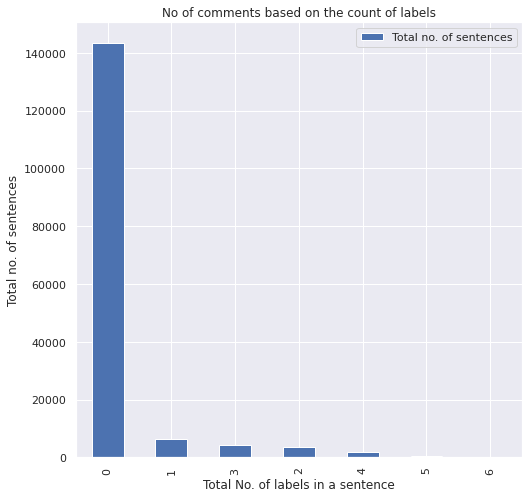

In [76]:
df_sentences = pd.DataFrame(pd.DataFrame(df_train_copied[df_train_copied.columns[2:8]].sum(axis=1)).reset_index()[0].value_counts())
df_sentences["Total no. of sentences"]=df_sentences[0]
df_sentences["Total No. of labels in a sentence"]=df_sentences.index
df_sentences.drop([0],axis=1,inplace=True,)
df_sentences.plot(x="Total No. of labels in a sentence", y="Total no. of sentences", kind='bar',figsize=(8,8))
plt.title("No of comments based on the count of labels")
plt.ylabel('Total no. of sentences', fontsize=12)
plt.xlabel('Total No. of labels in a sentence', fontsize=12)

<div class="alert alert-danger">
    <h1>PROJECT REPORT</h1>
</div>



# Overview

- the task is ranking comments in order of severity of toxicity. You are given a list of comments, and each comment should be scored according to their relative toxicity.Comments with a higher degree of toxicity should receive a higher numerical value compared to comments with a lower degree of toxicity.


- the problems we face such as cleaning the data, how to give a penalty for each category in comments
  and the balance of this data must be balanced to give a good accuracy when entered to the model
  and make it generalized 


- and try to solve them such as in cleaning used advanced regex for replace patterns with others
  and Create a score that measure how much toxic is a comment
  


- this task like similar problems in text classification problems but, in this we give a score for each 
  sentence
  

- there 's another problem similar to it is email classification problem


- In the email classification problem we have a set of email documents, the test documents, that are to be
  classified into a set of folders (the classes). We are
  given a set of folders that contain email documents that have previously been filed by a user. These           documents are the training documents. Each training document has a class label by virtue of the fact that it   is a member of some folder.
  

- the strategies to solve it is the three specific classification technologies used for our evaluation. The       specific classification technologies are a support vector machine (SVM), a TF-IDF classifier, and a simple     language model called the unigram model. Previous work has demonstrated that support vector
  machines (SVMs) are exceptionally well suited to text classification. (Dumais, Platt, Heckerman, & Sahami,
 1998) Unfortunately, SVMs have several shortcomings with respect to the challenges of our domain. We describe   each of the methods focusing on issues related to the challenges of our domain.
 
 
 - and this the paper about email classification problem talked about it,the challenges and how to solve it
   [Challenges of the Email Domain for Text Classification](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.475.2087&rep=rep1&type=pdf)

# Dataset

As there is no training for this project.competition, we have used Toxic comments classification challenge dataset for the training purpose, along with this we have a set of paired toxicity rankings that can be used to validate models.
The data set for this competition/project contains three csv files


Files


- comments_to_score.csv – While using this csv file I predicted  a score that represents the relative toxic severity of the comment. 


- sample_submission.csv – A sample submission file


- validation_data.csv – contains pair rankings that are  used to validate models

The size of the dataset was 28.85 MB 

While the “Toxic Comments Classification Challenge ” dataset used for training has an size of 55.18 MB and contains


- sample_submission.csv.zip


- test.csv.zip


- test_labels.csv.zip


- train.csv.zip


# Features

- The feature Extraction technique gives us new features which are a linear combination of the existing      features. The new set of features will have different values as compared to the original feature values. The main aim is that fewer features will be required to capture the same information.


- The feature set can be seen as the most informative and indicative subset of the training set.
  It improves and expedites a certain classifier by reducing the size of powerful vocabulary. In addition,
  it mitigates the risks of overfitting problems and strengthens the categorization performance by accounting   for noisy attributes. 
  
  
- First is the pre-processing step, which is crucial but doesn’t need to be too complex. In fact, the only thing we need to do is to remove punctuation and convert everything to lowercase.Then comes the vectorization step, which produces numerical features for the classifier. For this we used TF-IDF, a simple vectorization technique that consists in computing word frequencies and downscaling them for words that are too common. 


- Getting the number of frequeny for each category


- Getting the most frequent words in unigram,bigram and trigram and visualize them 


- We extracted the feature whether the comment is low toxic or more toxic


- it's about extracted 5 features from the data

# Models

Machine learning algorithms use historical data as input to predict new output values, Each Machine Learning algorithm have different Maths intuition behind it, along with this each Machine Learning algorithm have different parameters involved in it 


We have used the following models for the training and testing purpose

- Naive Bayes classifier

- Decision Tree classifier

- SVM classifier

- Tri-gram Language Model

- Neural Network classifier

- Random Forest classifier

- Ensemble Model classifier (Soft voting and Hard voting)


Now , we 'll give a brief summary of how each model work and which appoarch follow

1. Naive Bayes classifier
 - Naive Bayes is a probabilistic algorithm that take advantage of probability theory and Bayes’ Theorem to predict the tag of a text
 - they calculate the probability of each tag for a given text, and then output the tag with the highest one.
 ---
2. Decision Tree Classifier
 - It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. 
 - This creates categories within categories, allowing for organic classification with limited human supervision.
 - The decision rules are generally in form of if-then-else statements. The deeper the tree, the more complex the rules and fitter the model.
 ---
3. SVM classifier
 - SVM is an algorithm that determines the best decision boundary between vectors that belong to a given group  and vectors that do not belong to it.

 - It can be applied to any kind of vectors which encode any kind of data. This means that in order to leverage the power of svm text classification
 ---
4. Tri-gram Language Model
 - It can be represented in a comprehensive and summarized way as N-gram Graphs. The comparison of these graphs can be quantified to provide a measure of similarity between a text with the corresponding label for each category 
---
5. Neural Network classifier
 - in this model we used a neural network to classifiy our text into labels
 - Adding 3 layers (input , hidder and output) layers
 - hiddeen layers consist of 64 nodes and used **relu** activation function
 - output layer is 1 node and used **sigmoid** activation function
 - and optimize the weights of each node using **adam optimizer**
 ---
6. Random Forest classifier
 - Random Forest is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting), typically with **max_samples** set to the size of the training set
 
 - The Random Forest algorithm introduces extra randomness when growing trees instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which trades a higher bias for a lower variance,
   generally yielding an overall better model.
---
7. Ensemble Model classifier (Voting Classifier)
 - Ensemble methods work best when the predictors are as independent from one another as possible.
 - One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of errors, improving the ensemble’s accuracy.
 - when using **Hard Voting** means predict the class with highest probability
 - when using **Soft Voting** means averaged over all the individual classifiers. It often achieve higher performance

# Evaluation

After training the model we then apply the evaluation measures to check how the model is performing.

Each Machine Learning model has differen maths intuition involved in it and its own architecture. 

our metric is **Accuracy**: the percentage of texts that were categorized with the correct tag

After doing performance analysis, it can be seen that:


| Model | Accuracy
| :- | -: |
| SVM classifier |  64%
| Ensemble Model Classifier | 63.50%
| Naive Bayes Classifier | 61.35%
| Random Forest Classifier | 60.52%
| Decision Tree Classifier  | 23.2%

# Discussion

our findings is after all of that we trained a large uncleaned text to a lot of machine learning models
and get the accuracy for each one and will discuss some notes of them below


as we see the accuracy of each model will be arrange as it from best one to worest one

1. SVM classifier
2. Ensemble Model Classifier
3. Naive Bayes Classifier
4. Random Forest Classifier
5. Decision Tree Classifier 


- the best model is **Svm Classifier** and give a good accuracy because the high dimensional input space of     the text.When working with text we convert it to vectors using **TF-IDF** make it has high dimensional space.SVM use overfitting protection, which doesn't depend on the number of features and handle these large         feature spaces


- the worest model is **Decision Tree Classifier** and give a bad accuracy , as we said we have a high dimensional space of numbers when vectorize text to numbers and decision tree nedd several key nodes and it's hard to find , so decision tree doesn't work fine for high dimensions space 


- in evaluation step which give the accuracy for each model and each one is different from another
  each model work on different intuition and has a different structure


- to improve the performance and get better accuracy we can deep learning models for training
  such as using **RNN and LSTM** neural network which give higher accuracy. and using **pretrained transformers** such as **Bert Ensemble**

# Conclusion 

In this task using toxic comments dataset we have ranked comments in order of severity of toxicity. A list of comments was provided, and each comment was scored according to their relative toxicity. The comments with a higher degree of toxicity should receive a higher numerical value compared to comments with a lower degree of toxicity. We tested trained and tested the dataset using different Machine Learning Naive Bayes classifier, Decision Tree classifier, SVM classifier, Tri-gram Language Model, Neural Network classifier, Random Forest classifier and Ensemble Model classifie. It can be seen that an adequate level of performacne can be achieved through the design. In terms of future work, we can create an real time android or web application to test our designed model in real time.